## Problem Statement  
------- 
-------
Your Organization puts in a lot of effort in bidding preparation with no indications whether it will be worth it. With multiple managers and VP willing to work on every opportunity, it becomes difficult for the management to decide which bid should be given to which manager and VP. You are hired to help your organization identify the best manager-VP combination who can convert an opportunity to win with the provided data points.


-------

#### Objective 1: Predictive Analytics - Build a ML model to predict the probability of win/loss for bidding activities for a potential client.
#### Objective 2: Prescriptive Analytics – Identify variable/s that are most likely to help in converting an opportunity into a win.


## Data Dictionary 
----- 
1. Client Category	Industry in which the client works
2. Solution Type	The solution group the client requires
3. Deal Date The date the opportunity was created
4. Sector	The sector for which the solution is to be provided
5. Location	Client location
6. VP Name	Sr. Manager or VP whi is dealing with the client
7. Manager Name	Manager of the team working on the project
8. Deal Cost	The initial cost of the deal
9. Deal Status Code	Final status of the deal(won/lost)


## Project Outline

## 1. Load libraries 

In [1]:
#Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline  
#Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

import warnings 
warnings.filterwarnings('ignore')



## 2. EDA

In [2]:
data=pd.read_excel('Win_Prediction_Data.xlsx') 


In [3]:
## print shape of dataset with rows and columns
print(data.shape)



(10061, 9)


In [4]:
## Print the name of the dataset columns
print(data.columns)

Index(['Client Category', 'Solution Type', 'Deal Date', 'Sector', 'Location',
       'VP Name', 'Manager Name', 'Deal Cost', 'Deal Status Code'],
      dtype='object')


In [5]:
## Print the dataset head 
data.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [7]:
data.dtypes

Client Category             object
Solution Type               object
Deal Date           datetime64[ns]
Sector                      object
Location                    object
VP Name                     object
Manager Name                object
Deal Cost                  float64
Deal Status Code            object
dtype: object

### Observations till now:

* There are 9 attributes of data
* Categorical Attributes : Client Category, Solution Type, Deal Date, Sector, Location, VP Name, Manager Name, Deal Cost, Deal Status Code
* Continuous Categorical : Deal Cost.
* Data type of few attributes need to be changed.

In [8]:
data.describe()

,Deal Cost
count,1.006100e+04
mean,7.668969e+05
std,1.619894e+06
min,0.000000e+00
25%,1.897059e+05
50%,3.823529e+05
75%,7.647059e+05
max,3.676471e+07


In [9]:
data['Client Category'].replace({'Energy ': 'Energy'}, inplace=True)
#List of categorical variables 
cat_data=['Client Category', 'Solution Type', 'Sector', 'Location'] 
#List of numerical variables
num_data=['Deal Cost'] 
#Target variable
target=['Deal Status Code']
#VP + Manager Names 
Names_data=['VP Name', 'Manager Name']
#Date Data 
date_data=['Deal Date']

In [10]:
print('Categorical variables :',cat_data )
print('Numerical variables :',num_data ) 

Categorical variables : ['Client Category', 'Solution Type', 'Sector', 'Location']
Numerical variables : ['Deal Cost']


In [11]:
#Check whether the data is balanced 
data[target].value_counts(normalize=True)

Deal Status Code
Lost                0.626777
Won                 0.373223
dtype: float64

We may consider the dataset balanced 

In [12]:
data.isnull().sum() 


Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64


-----------------------------

### (3.1) For numeric data

* Made histograms to understand distributions
* Corrplot
* Pivot table comparing target rate across numeric variables




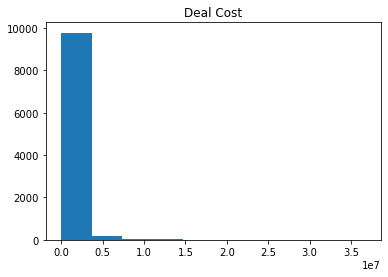

In [13]:
#distributions for all numeric variables 
for i in num_data: 
    plt.hist(data[i])
    plt.title(i)
    plt.show() 

In [14]:
#custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
    

    size = len(var_group)
    

    #looping for each variable
    for j,i in enumerate(var_group):
        
        plt.figure(figsize = (7*size,5), dpi = 100)

        # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # calculating points of standard deviation
        points = mean-st_dev, mean+st_dev

        #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.kdeplot(data[i], shade=True)
        sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
        plt.axvline(mini , color='orange', ls=':', label='Min')
        plt.axvline(maxi, color='yellow', ls=':', label='Max')
        plt.axvline(mean, color='red', ls=':', label='Mean')
        plt.axvline(median, color='green', ls=':', label='Median')
        
        plt.legend()
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                       round(kurt,2),
                                                                                                       round(skew,2),
                                                                                                       (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                       round(mean,2),
                                                                                                       round(median,2)))
       

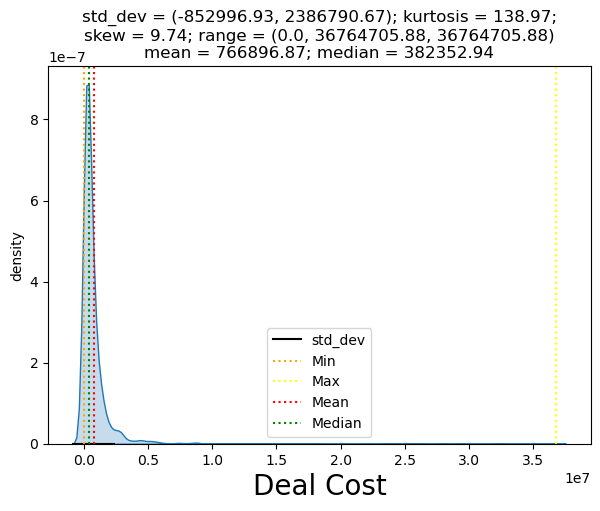

In [15]:
UVA_numeric(data, num_data)

### (3.2) For Categorical Data
* Made bar charts to understand balance of classes
* Made pivot tables to understand relationship with target

In [16]:
for fet in cat_data:
    data[fet] = data[fet].astype('category')

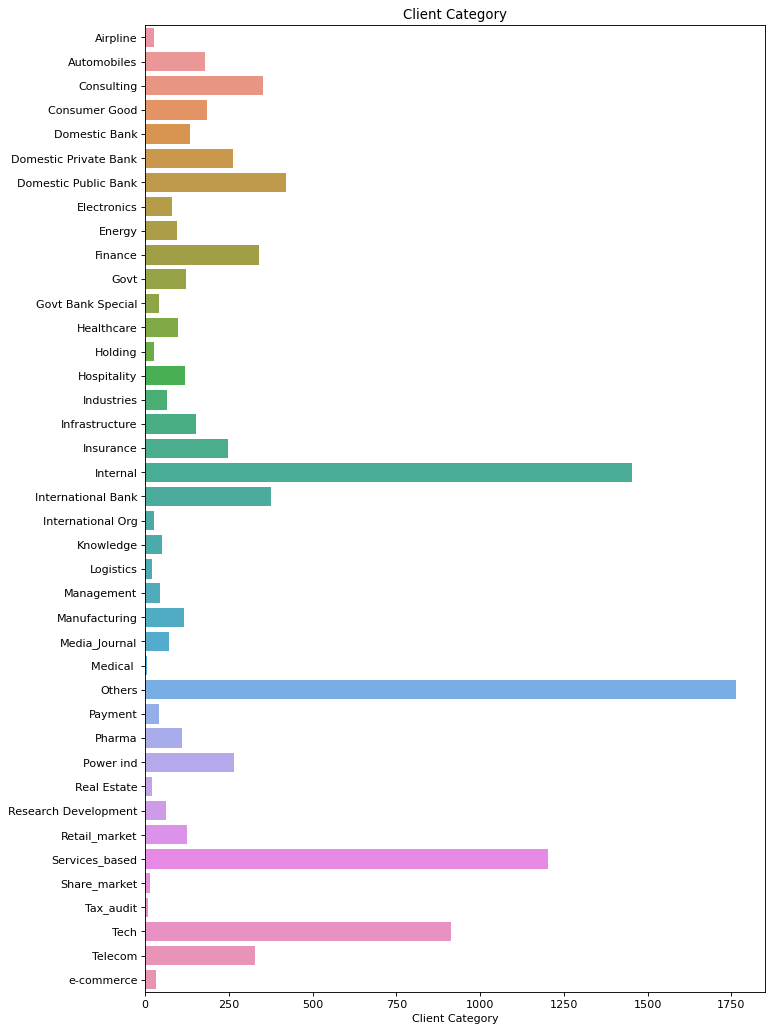

Others                   1763
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Energy                     94
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
e-commerce                 32
Airpline                   27
Holding   

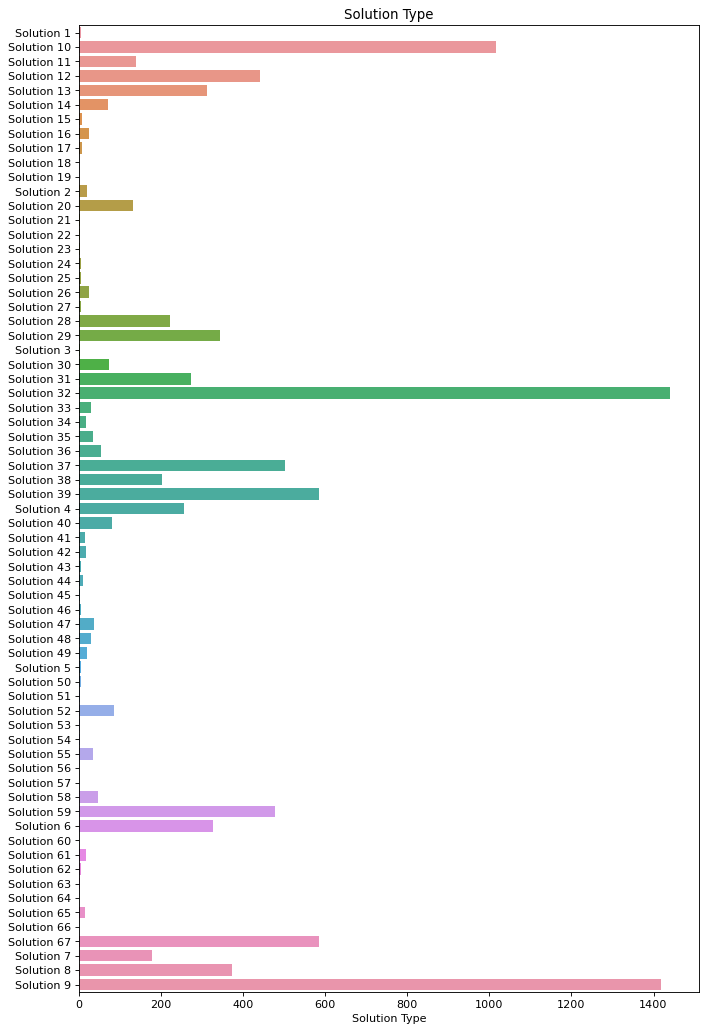

Solution 32    1439
Solution 9     1418
Solution 10    1016
Solution 39     585
Solution 67     584
               ... 
Solution 19       1
Solution 66       1
Solution 57       1
Solution 56       1
Solution 18       1
Name: Solution Type, Length: 67, dtype: int64


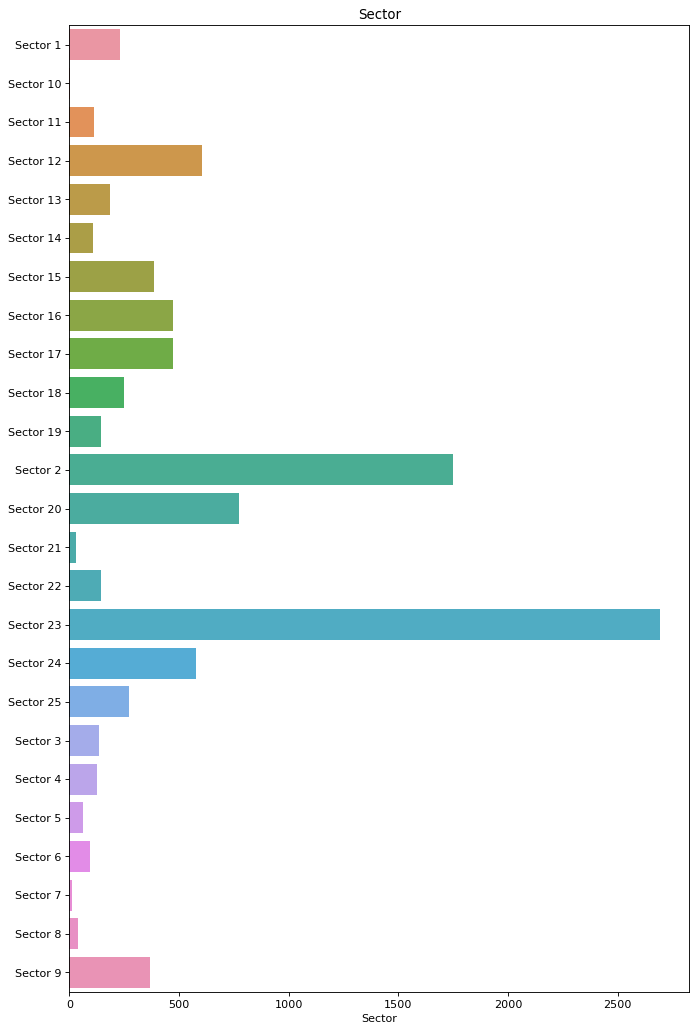

Sector 23    2693
Sector 2     1748
Sector 20     773
Sector 12     607
Sector 24     578
Sector 17     474
Sector 16     474
Sector 15     387
Sector 9      369
Sector 25     273
Sector 18     251
Sector 1      231
Sector 13     185
Sector 22     144
Sector 19     142
Sector 3      135
Sector 4      128
Sector 11     114
Sector 14     109
Sector 6       96
Sector 5       64
Sector 8       39
Sector 21      30
Sector 7       14
Sector 10       3
Name: Sector, dtype: int64


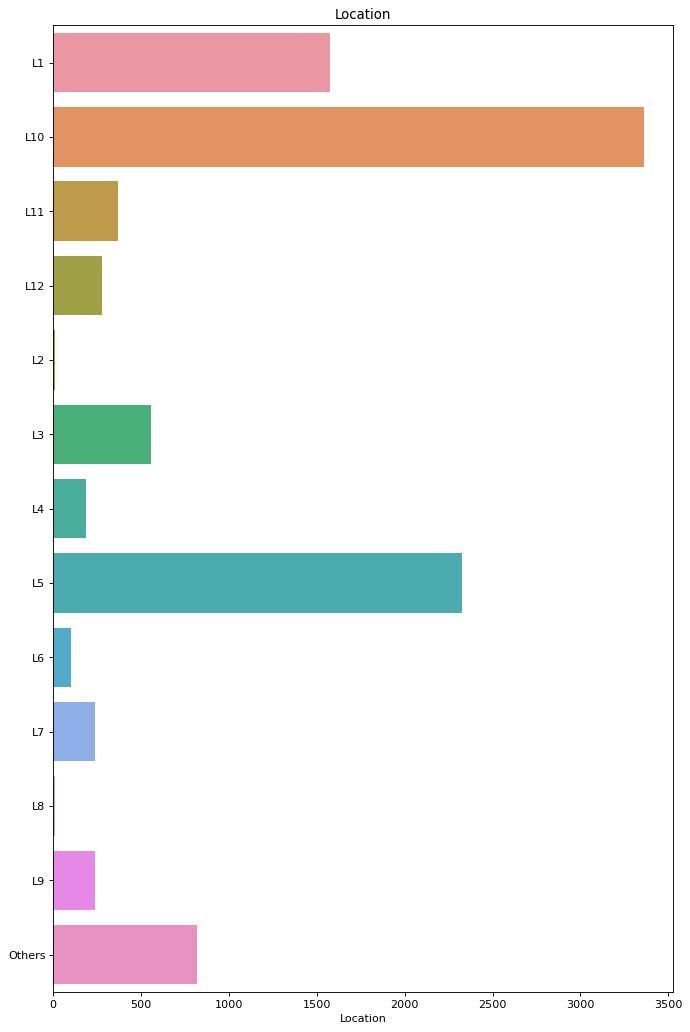

L10       3360
L5        2328
L1        1572
Others     817
L3         556
L11        367
L12        276
L9         240
L7         238
L4         188
L6         100
L8          11
L2           8
Name: Location, dtype: int64


In [17]:
# setting figure_size 
from matplotlib.pyplot import figure
#plt.figure(figsize=(20,10), dpi=100)
for i in  cat_data:
    figure(figsize=(10,16), dpi=80)
    sns.barplot(data[i].value_counts(),data[i].value_counts().index ).set_title(i)  
    plt.show()
    print(data[i].value_counts())

In [18]:
# Comparing survival and each of these categorical variables 
#['Client Category', 'Solution Type', 'Sector','Deal Date', 'Location','VP Name', 'Manager Name'] 
print(pd.pivot_table(data, index = 'Deal Status Code', columns = 'Sector', values = 'Deal Cost' ))

Sector                 Sector 1  Sector 10      Sector 11      Sector 12  \
Deal Status Code                                                           
Lost              613037.974810   29411.77  739172.366977  535514.343744   
Won               524375.504795  311176.47  388245.799286  739632.719204   

Sector               Sector 13      Sector 14      Sector 15     Sector 16  \
Deal Status Code                                                             
Lost              1.421940e+06  362345.768049  813788.336154  1.255285e+06   
Won               6.606916e+05  544716.777037  438658.208824  6.957036e+05   

Sector               Sector 17      Sector 18      Sector 19       Sector 2  \
Deal Status Code                                                              
Lost              7.797553e+05  832332.421860  727485.995714  895682.700642   
Won               1.027609e+06  775491.437342  448189.655172  802698.875503   

Sector               Sector 20   Sector 21      Sector 22      Se

Deal Cost winnings was registered  : * Maximum Sector 20 
                                     * Minimum Sector 5
                                    

Deal Cost loses was registred in Sector  : * Maximum  13
                                           * Minimum  10
                                                            
Sectors Where won deal cost < Lost deal cost: 1 11 13 15 16 18 19 2 24 25 3 4 5 6 7 9  (Majority of deals were lost )

In [19]:
print(pd.pivot_table(data, index = 'Deal Status Code', columns = 'Client Category', values = 'Deal Cost' ))

Client Category        Airpline    Automobiles    Consulting  Consumer Good  \
Deal Status Code                                                              
Lost              482887.701818  706355.042679  6.088462e+05  629885.954898   
Won               549411.768000  537281.641061  1.528884e+06  859452.332644   

Client Category   Domestic Bank  Domestic Private Bank  Domestic Public Bank  \
Deal Status Code                                                               
Lost               1.495498e+06          881407.086023          1.070093e+06   
Won                1.919716e+06          688611.491860          5.993003e+05   

Client Category     Electronics        Energy        Finance           Govt  \
Deal Status Code                                                              
Lost              553812.637407  1.154716e+06  530710.997739  932606.018837   
Won               596633.987407  7.424221e+05  451173.773211  450806.723143   

Client Category   Govt Bank Special     Healt

Deal Cost winnings was registered  : * Maximum Holding 
                                     * Minimum Share Market
                                    

Deal Cost loses was registred in Sector  : * Maximum  Insurance 
                                           * Minimum Share Market

In [20]:
print(pd.pivot_table(data, index = 'Deal Status Code', columns = 'Solution Type', values = 'Deal Cost' ))

Solution Type     Solution 1    Solution 10   Solution 11    Solution 12  \
Deal Status Code                                                           
Lost               224117.65  676461.210986  1.543663e+06  825068.800058   
Won                150196.08  594538.975828  3.059717e+06  897737.095714   

Solution Type       Solution 13   Solution 14    Solution 15    Solution 16  \
Deal Status Code                                                              
Lost              826709.730748  1.018263e+06  889215.686667  608529.412222   
Won               702220.889286  5.171639e+05  347794.115000  650735.295000   

Solution Type      Solution 17  Solution 18  Solution 19     Solution 2  \
Deal Status Code                                                          
Lost              1.029412e+06          NaN          NaN  651102.942500   
Won               6.669118e+05     225000.0    485294.12  390481.284545   

Solution Type       Solution 20  Solution 21  Solution 22  Solution 23  \
Dea

Deal Cost winnings was registered  : * Maximum  11
                                     * Minimum 65
                                    

Deal Cost loses was registred in Sector  : * Maximum  Solution 61
                                           * Minimum 3

In [21]:
print(pd.pivot_table(data, index = 'Deal Status Code', columns = 'Location', values = 'Deal Cost' )) 


Location                     L1            L10            L11           L12  \
Deal Status Code                                                              
Lost              568322.368838  838808.757964  394284.990431  1.152743e+06   
Won               788830.659970  784242.842699  541379.085778  6.652551e+05   

Location                    L2             L3             L4             L5  \
Deal Status Code                                                              
Lost              1.205882e+06  482105.089944  586475.257143  793381.085661   
Won               7.132353e+05  384011.765300  416465.845161  784038.147735   

Location                     L6             L7           L8             L9  \
Deal Status Code                                                             
Lost              686176.471429  538164.300575  1461764.704  592328.684845   
Won               316196.079000  466530.331250    73529.410  348299.234130   

Location                Others  
Deal Status Code    

Deal Cost winnings was registered  : * Maximum Others 
                                     * Minimum L8
                                    

Deal Cost loses was registred in Sector  : * Maximum  L2
                                           * Minimum  L3

In [22]:
def Boxplot_Bivariate(data, cont, cat):
    figure(figsize=(15,10),dpi=80)
    sns.boxplot(x=cat, y=cont, data=data)
    plt.title('Bivariate boxplot')
    plt.show() 

In [23]:
#for col2 in cat_data:
#        Boxplot_Bivariate(data, col2, 'Deal Cost' ) 

In [24]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  figure(figsize=(10,15),dpi=80)
  sns.countplot(y=cat, hue=tar, data=data, orient='h')
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  figure(figsize=(15,10),dpi=80)
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1),figsize=(15,10))
  int_level = data[cat].value_counts()

In [25]:
#BVA_categorical_plot(data,'Deal Status Code','Client Category')

In [26]:
#BVA_categorical_plot(data,'Deal Status Code','Solution Type')

In [27]:
#BVA_categorical_plot(data,'Deal Status Code', 'Sector')

In [28]:
#BVA_categorical_plot(data,'Deal Status Code', 'Manager Name')

In [29]:
#BVA_categorical_plot(data,'Deal Status Code', 'Location')

In [30]:
#create pair plot
#sns.pairplot(data=data,hue='Deal Status Code',diag_kind='kde')
#plt.show()


Outliers in Internal category, Sector 20, 16, L10, Others 
Most frequent deals (Lost or Won) were observed in L, L, Others , sectors 12, 2, 23,24,9,20, Tech Service Based  

## 4. Pre-processing   
- Dealing With missing Values 
- Remove duplicated instances 
- Replace Outliers with IQR / perform logarithmic transformation
- Feature Engineering (Date ==> Month and Year / What about Name ?)
- Grouping some variables together 
- One hot encoding for CLient Category / Sector /Solution Type / Location / Names
- Scaling and Normalization 
- Drop Date Deal Column  


In [31]:
#Checking the null values 
data.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

We will impute with mode value: For the categorical column, you can replace the missing values with mode values i.e the frequent ones.


In [32]:
data['Client Category']=data['Client Category'].fillna(data['Client Category'].mode()[0])

In [33]:
data.isnull().sum()

Client Category     0
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
Deal Status Code    0
dtype: int64

In [34]:
#Check the most frequent value in Client Category 
data['Client Category'].mode()[0]

'Others'

In [35]:
#Check the most frequent value in Solution Type 
data['Solution Type'].mode()[0]

'Solution 32'

In [36]:
#Check the most frequent value in Sector 
data['Sector'].mode()[0]

'Sector 23'

In [37]:
#Check the most frequent value in Location
data['Location'].mode()[0]

'L10'

In [38]:
#Check the most frequent value in VP Name
data['VP Name'].mode()[0]

'Mervin\xa0Harwood'

In [39]:
##Check the most frequent value in Deal Status Code 
data['Deal Status Code'].mode()[0]

'Lost'

In [40]:
#Check duplicated rows 
data[data['Client Category']=='Energy']

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
36,Energy,Solution 37,2012-02-16,Sector 9,L5,Sargar Deep Rao,Sang Ingle,294117.65,Lost
56,Energy,Solution 6,2012-04-28,Sector 9,L5,Sargar Deep Rao,Sang Ingle,294117.65,Lost
102,Energy,Solution 6,2012-01-21,Sector 9,L5,Sargar Deep Rao,Sang Ingle,294117.65,Lost
133,Energy,Solution 37,2012-03-15,Sector 9,L5,Sargar Deep Rao,Sang Ingle,294117.65,Lost
229,Energy,Solution 59,2012-02-04,Sector 9,L10,Sargar Deep Rao,Anoop Jatley,1323529.41,Lost
...,...,...,...,...,...,...,...,...,...
9735,Energy,Solution 9,2018-11-11,Sector 15,L5,Rahul Kocher,Sarwan Singh,13235294.12,Lost
9760,Energy,Solution 36,2019-02-03,Sector 15,L5,Vikram Rawat,Ranjan Prakash,2647058.82,Lost
9781,Energy,Solution 36,2019-03-11,Sector 15,L5,Vikram Rawat,Ranjan Prakash,2647058.82,Lost
9847,Energy,Solution 6,2018-11-09,Sector 15,L5,Gaurav Sameria,Aman Gupta,867647.06,Won


In [41]:
data.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [42]:
#Extract year and month information from date 
data['year'] = data['Deal Date'].dt.year
data['month'] = data['Deal Date'].dt.month


In [43]:
data.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,year,month
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6


In [44]:
#Check duplicated values
x=data[data.duplicated(subset=('Client Category','Solution Type','Deal Date','Sector','Location','VP Name','Manager Name','Deal Cost','Deal Status Code','year'))]
x


,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,year,month
3036,Domestic Public Bank,Solution 32,2015-03-20,Sector 2,L7,Rosanna Maynez,Earline Langton,735294.12,Lost,2015,3
3385,Tech,Solution 32,2015-07-31,Sector 2,L10,Long Bergstrom,Emil Knudsen,235294.12,Lost,2015,7
3880,Telecom,Solution 12,2013-08-30,Sector 24,Others,Mangesh K. Singh,Sohil Kumar,588235.29,Lost,2013,8
5037,Tech,Solution 13,2012-05-08,Sector 23,L5,Sargar Deep Rao,Karan Dubey,0.00,Lost,2012,5
7637,Govt,Solution 34,2018-02-21,Sector 4,L10,Mervin Harwood,Akshay Sharma,602941.18,Lost,2018,2
7705,Internal,Solution 9,2015-01-06,Sector 20,Others,Sargar Deep Rao,Brenton Launius,2120294.12,Lost,2015,1
7718,Services_based,Solution 26,2018-02-11,Sector 17,L10,Molly Eakes,vansu dev,264705.88,Lost,2018,2
8020,Internal,Solution 9,2015-07-02,Sector 2,L9,Sargar Deep Rao,Rahul Kocher,264705.88,Lost,2015,7
8167,Infrastructure,Solution 9,2015-05-18,Sector 24,L10,Mervin Harwood,nahar singh,352941.18,Lost,2015,5
8177,Services_based,Solution 9,2015-10-03,Sector 23,L1,Ankita Aggarwal,bhagwati prasad,147058.82,Lost,2015,10


In [45]:
#Drop duplicated rows 
data.drop_duplicates(inplace=True)

In [46]:
#Drop Date column 
data.drop( 'Deal Date', axis=1, inplace=True)

In [47]:
#Quantile based flooring and capping of the Deal Cost variable  
#### Lets compute the Interquantile range to calculate the boundaries 
#IQR=data['Deal Cost'].quantile(0.75)-data['Deal Cost'].quantile(0.25)
#high_boundary=data['Deal Cost'].quantile(0.9)
#low_boundary=data['Deal Cost'].quantile(0.1)
#data['Deal Cost'] = np.where(data['Deal Cost']>high_boundary, high_boundary, data['Deal Cost'])


<AxesSubplot:xlabel='Deal Cost'>

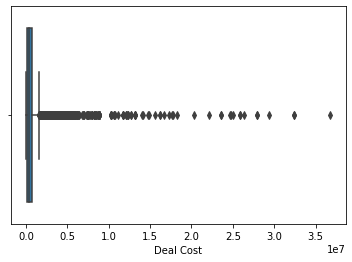

In [48]:
sns.boxplot(x=data['Deal Cost'])

In [49]:
#Scaling down the features  
from sklearn.preprocessing import StandardScaler  
scaler=StandardScaler()
data['Deal Cost']=scaler.fit_transform(data['Deal Cost'].values.reshape(-1, 1))


In [50]:
#Cardinality of VP Name 
data['VP Name'].value_counts()

Mervin Harwood         1163
Ankita Aggarwal        1142
Sargar Deep Rao         953
Long Bergstrom          920
Mangesh K. Singh        811
Rosanna Maynez          659
Ekta Zutshi             550
Rahul Bajpai            523
neeraj kumar            471
Son Mcconnaughy         232
som dutt                220
Hardeep Suksma          207
Brendon Wycoff          189
Clinton Mani            184
Saurabh Singh           176
Jewell Tunstall         156
Rudraksh Sharma         147
Gopa Trilochana         136
Russell Dahlen          133
Alam Syed               126
Molly Eakes             125
Gaurav Sameria          114
Gayle Molter            104
Varsha Arora            104
Vidur Hukle             100
Earline Langton          82
Manpreet Singh           46
Mayank Mewar             41
Rahul Kocher             32
Marcella Mo              32
Man Suddeth              29
Jitendra Choudhary       28
Prashant Rawat           27
Lilli Storrs             26
Vikram Rawat             17
Kamelesh Srinivasan 

In [51]:
#first we make a dictionary that maps each label to the counts
VPName_freqeuncy_map=data['VP Name'].value_counts().to_dict() 
ManagerName_freqeuncy_map=data['Manager Name'].value_counts().to_dict()

In [52]:
VPName_freqeuncy_map

{'Mervin\xa0Harwood': 1163,
 'Ankita Aggarwal': 1142,
 'Sargar Deep Rao': 953,
 'Long\xa0Bergstrom': 920,
 'Mangesh K. Singh': 811,
 'Rosanna\xa0Maynez': 659,
 'Ekta Zutshi': 550,
 'Rahul Bajpai': 523,
 'neeraj kumar': 471,
 'Son\xa0Mcconnaughy': 232,
 'som dutt': 220,
 'Hardeep Suksma': 207,
 'Brendon\xa0Wycoff': 189,
 'Clinton\xa0Mani': 184,
 'Saurabh Singh': 176,
 'Jewell\xa0Tunstall': 156,
 'Rudraksh Sharma': 147,
 'Gopa Trilochana': 136,
 'Russell\xa0Dahlen': 133,
 'Alam Syed': 126,
 'Molly\xa0Eakes': 125,
 'Gaurav Sameria': 114,
 'Gayle\xa0Molter': 104,
 'Varsha Arora': 104,
 'Vidur Hukle': 100,
 'Earline\xa0Langton': 82,
 'Manpreet Singh': 46,
 'Mayank Mewar': 41,
 'Rahul Kocher': 32,
 'Marcella\xa0Mo': 32,
 'Man\xa0Suddeth': 29,
 'Jitendra Choudhary': 28,
 'Prashant Rawat': 27,
 'Lilli\xa0Storrs': 26,
 'Vikram Rawat': 17,
 'Kamelesh Srinivasan': 15,
 'Dennis\xa0Faux': 13,
 'Visvajeet Das': 3,
 'Waylon\xa0Mulder': 3,
 'P. Somya': 2,
 'Kirk\xa0Hofmeister': 2,
 'Sarthak Batra': 2,

In [53]:
ManagerName_freqeuncy_map

{'Molly\xa0Eakes': 323,
 'Rudraksh Sharma': 270,
 'Desmond\xa0Krout': 230,
 'Gayle\xa0Molter': 186,
 'Manpreet Singh': 181,
 'Rosana\xa0Yokum': 179,
 'Rayford\xa0Durgan': 170,
 'Manish Saundriyal': 160,
 'Jewell\xa0Tunstall': 159,
 'Hardeep Suksma': 151,
 'ram kumar': 148,
 'Rahul Kocher': 144,
 'Russell\xa0Dahlen': 143,
 'Marcella\xa0Mo': 137,
 'Atul Chaudhary': 134,
 'vansu dev': 131,
 'Harsh Verma': 127,
 'Roop Sachdeva': 127,
 'Clinton\xa0Mani': 120,
 'rohit': 118,
 'Vinay Kumar': 118,
 'Tanuj Bindra': 114,
 'Karna Bhuvennant': 112,
 'nahar singh': 108,
 'Vidur Hukle': 107,
 'Ayusha Gupta': 106,
 'Saurabh Singh': 103,
 'Shalendra D.': 99,
 'bhagwati prasad': 98,
 'David Toms': 97,
 'Jean\xa0Sappington': 96,
 'Abhinav Warrier': 95,
 'Darin\xa0Vath': 94,
 'Abhiskek Kumar': 94,
 'Eesha Yadav': 92,
 'mohd shakib': 89,
 'Gaurav Sameria': 89,
 'Jackie\xa0Wolfson': 88,
 'Rajneesh Tanwar': 86,
 'Gopa Trilochana': 86,
 'mohd khairul': 85,
 'Md Irshad': 85,
 'Luv Malhotra': 83,
 'Sanchita Gu

In [54]:
# and now we replace both VP name and Manager Name labels in the dataset df
#data['VP_name_encoded'] = data['VP Name'].map(VPName_freqeuncy_map)
data['Manager_name_encoded'] = data['Manager Name'].map(ManagerName_freqeuncy_map)

In [55]:
#Encode the target variable as Won: 1 and Lost 0
data['Deal Status Code']=data['Deal Status Code'].replace({'Lost': 0, 'Won':1})

In [56]:
data.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,year,month,Manager_name_encoded
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,-0.380859,1,2012,3,86
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,-0.013938,1,2012,9,86
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,-0.436387,0,2011,8,143
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,-0.436387,0,2011,4,143
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,-0.423503,0,2011,6,143


In [57]:
data['Sector'].value_counts()

Sector 23    2690
Sector 2     1743
Sector 20     771
Sector 12     607
Sector 24     576
Sector 16     474
Sector 17     473
Sector 15     387
Sector 9      369
Sector 25     273
Sector 18     251
Sector 1      231
Sector 13     185
Sector 22     144
Sector 19     142
Sector 3      135
Sector 4      127
Sector 11     114
Sector 14     109
Sector 6       96
Sector 5       64
Sector 8       39
Sector 21      30
Sector 7       14
Sector 10       3
Name: Sector, dtype: int64

In [58]:
#Number of unique labels in each categorical variables
for col in Names_data+ cat_data:
    print(col, ': ', len(data[col].unique()), ' labels')
   
def one_hot_encoding_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)

VP Name :  43  labels
Manager Name :  278  labels
Client Category :  40  labels
Solution Type :  67  labels
Sector :  25  labels
Location :  13  labels


In [59]:
train=data.copy()
top_10_labels = [y for y in train['Client Category'].value_counts().sort_values(ascending=False).head(10).index]
top_10_labels  
one_hot_encoding_top_x(train, 'Client Category', top_10_labels)
train.drop(columns=['Client Category'], inplace=True )  
cat_data=['Solution Type','Location','Sector'] 

#Copy the orignal datase into new data
#
#+ ['VP Name', 'Manager Name']
#One hot encoding on the categorical variables 
for column in cat_data:
    tempdata = pd.get_dummies(train[column], prefix=column)
    train = pd.merge(
        left=train,
        right=tempdata,
        left_index=True,
        right_index=True,
    )
    train.drop(columns=column, inplace=True)


In [60]:
train.drop(columns=['VP Name'], inplace=True)

In [61]:
train

,Manager Name,Deal Cost,Deal Status Code,year,month,Manager_name_encoded,Client Category_Others,Client Category_Internal,Client Category_Services_based,Client Category_Tech,Client Category_Domestic Public Bank,Client Category_International Bank,Client Category_Consulting,Client Category_Finance,Client Category_Telecom,Client Category_Power ind,Solution Type_Solution 1,Solution Type_Solution 10,Solution Type_Solution 11,Solution Type_Solution 12,Solution Type_Solution 13,Solution Type_Solution 14,Solution Type_Solution 15,Solution Type_Solution 16,Solution Type_Solution 17,Solution Type_Solution 18,Solution Type_Solution 19,Solution Type_Solution 2,Solution Type_Solution 20,Solution Type_Solution 21,Solution Type_Solution 22,Solution Type_Solution 23,Solution Type_Solution 24,Solution Type_Solution 25,Solution Type_Solution 26,Solution Type_Solution 27,Solution Type_Solution 28,Solution Type_Solution 29,Solution Type_Solution 3,Solution Type_Solution 30,Solution Type_Solution 31,Solution Type_Solution 32,Solution Type_Solution 33,Solution Type_Solution 34,Solution Type_Solution 35,Solution Type_Solution 36,Solution Type_Solution 37,Solution Type_Solution 38,Solution Type_Solution 39,Solution Type_Solution 4,Solution Type_Solution 40,Solution Type_Solution 41,Solution Type_Solution 42,Solution Type_Solution 43,Solution Type_Solution 44,Solution Type_Solution 45,Solution Type_Solution 46,Solution Type_Solution 47,Solution Type_Solution 48,Solution Type_Solution 49,Solution Type_Solution 5,Solution Type_Solution 50,Solution Type_Solution 51,Solution Type_Solution 52,Solution Type_Solution 53,Solution Type_Solution 54,Solution Type_Solution 55,Solution Type_Solution 56,Solution Type_Solution 57,Solution Type_Solution 58,Solution Type_Solution 59,Solution Type_Solution 6,Solution Type_Solution 60,Solution Type_Solution 61,Solution Type_Solution 62,Solution Type_Solution 63,Solution Type_Solution 64,Solution Type_Solution 65,Solution Type_Solution 66,Solution Type_Solution 67,Solution Type_Solution 7,Solution Type_Solution 8,Solution Type_Solution 9,Location_L1,Location_L10,Location_L11,Location_L12,Location_L2,Location_L3,Location_L4,Location_L5,Location_L6,Location_L7,Location_L8,Location_L9,Location_Others,Sector_Sector 1,Sector_Sector 10,Sector_Sector 11,Sector_Sector 12,Sector_Sector 13,Sector_Sector 14,Sector_Sector 15,Sector_Sector 16,Sector_Sector 17,Sector_Sector 18,Sector_Sector 19,Sector_Sector 2,Sector_Sector 20,Sector_Sector 21,Sector_Sector 22,Sector_Sector 23,Sector_Sector 24,Sector_Sector 25,Sector_Sector 3,Sector_Sector 4,Sector_Sector 5,Sector_Sector 6,Sector_Sector 7,Sector_Sector 8,Sector_Sector 9
0,Gopa Trilochana,-0.380859,1,2012,3,86,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Gopa Trilochana,-0.013938,1,2012,9,86,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Russell Dahlen,-0.436387,0,2011,8,143,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Russell Dahlen,-0.436387,0,2011,4,143,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Russell Dahlen,-0.423503,0,2011,6,143,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [62]:
train.drop(columns=['Manager Name'], inplace=True)

In [63]:
cat_data

['Solution Type', 'Location', 'Sector']

In [64]:
#Test data 
y=train['Deal Status Code'].to_numpy()
#Train data
X=train.drop(columns=['Deal Status Code'], inplace=True)


In [65]:
X=train.to_numpy()
X.shape

(10047, 119)

In [66]:
#Split dataset into train (70%) and test data (30%)
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X,y,test_size=0.30, random_state=2019, stratify=y)

## Model Building 

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier 
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
import lightgbm as lgb
#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import KFold

In [68]:
#Machine Learning Algorithm (MLA) Selection and Initialization
base_models = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(random_state=0),
    #max_depth=6,
    ensemble.ExtraTreesClassifier(random_state=0),
    ensemble.GradientBoostingClassifier(random_state=0),
    #max_depth=5,
    ensemble.RandomForestClassifier(random_state=0),

    #Gaussian Processes
   #gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    #linear_model.LogisticRegressionCV(),
    #Navies Bayes
    #naive_bayes.BernoulliNB(),
    #naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    #neighbors.KNeighborsClassifier(),
    
    #SVM
    #svm.SVC(probability=True),
    
    #Trees   max_depth=6,  
    tree.DecisionTreeClassifier(random_state=0),
    #tree.ExtraTreeClassifier(),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    #XGBClassifier(max_depth=4, eta=0.05, gamma=4), 
    XGBClassifier(),
    #lgb.LGBMClassifier(random_state=0)
    #lgb.LGBMClassifier(max_depth=4, learning_rate=0.05, random_state=0)
    ]

In [69]:
def model_cross_val(n_folds,X,y, base_models):
    #kfold = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) 
    #kfold = KFold(n_splits=n_folds, shuffle=True, random_state=156)  
    #index through MLA and save performance to table
    row_index = 0
    #create table to compare MLA metrics
    MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
    MLA_compare = pd.DataFrame(columns = MLA_columns)
    for alg in base_models:
        #set name and parameters
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
        scores = model_selection.cross_validate(alg, X, y, scoring='accuracy',return_train_score=True,cv  = n_folds)
        MLA_compare.loc[row_index, 'MLA Time'] =scores['fit_time'].mean()
        MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = scores['train_score'].mean()
        MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = scores['test_score'].mean()   
        #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
        MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = scores['test_score'].std()*3   #let's know the worst that can happen!
        #alg.fit(X_train, y_train)  
        #y_pred = alg.predict(X_val)  
        row_index+=1
        #print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
    MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
        #print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
         
    return MLA_compare
       
#MLA_predict
    

## Benchmark Model 

In [ ]:
#max_depth, min_child_weight and gamma.
#base_models=[lgb.LGBMClassifier(max_depth=4, learning_rate=0.05, random_state=0)]
n_folds=10
#Benchmark Model
mod=model_cross_val(n_folds,trainX, trainY, base_models) 
mod 

## Correlation Heat Map 

In [ ]:
ab

In [ ]:
#correlation heatmap of dataset
#import seaborn as sns
#corr=train.corr()
#top_features=corr.index
#plt.figure(figsize=(20,20))
#sns.heatmap(train[top_features].corr(),annot=True)

In [ ]:
#Remove correlated features
# Set the threshold
threshold = 0.8

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
a=correlation(train,threshold)

In [ ]:
print('Columns to remove : ', a)

In [ ]:
train.drop(columns=a , inplace=True)

In [ ]:
train

## Feature Selection  using Information gain

In [ ]:
trainX=[]
testX=[]
trainY=[] 
testY=[]
X=train
 
#SPlit dataset into train (70%) and test data (30%)
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X,y,test_size=0.30, random_state=2019)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(trainX, trainY)
mutual_info = pd.Series(mutual_info)
mutual_info.index = trainX.columns
mutual_info.sort_values(ascending=False)

In [ ]:
#let's plot the ordered mutual_info values per feature
mutual_info[0:50].sort_values(ascending=False).plot.bar(figsize=(20, 18))

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
from sklearn.metrics import accuracy_score
base_model_test=ensemble.RandomForestClassifier(random_state=0)

In [ ]:
#Select features using mutual information gain
#No we Will select the  top 24 important features
base_model_test=[]
base_model_test=ensemble.RandomForestClassifier(random_state=0)
num=170
#acc=[]
#for num in range(10,190,10):
sel_five_cols = SelectKBest(mutual_info_classif, k=num)
sel_five_cols.fit(trainX, trainY)
trainX[trainX.columns[sel_five_cols.get_support()]]  

scores = model_selection.cross_validate(base_model_test, trainX[trainX.columns[sel_five_cols.get_support()]] , trainY, scoring='accuracy',cv =10) 
#    acc.append(scores['test_score'].mean())
acc=scores['test_score'].mean()
#base_model_test.fit( trainX[trainX.columns[sel_five_cols.get_support()]].to_numpy() ,trainY)
#pred_test_y = base_model_test.predict(testX[testX.columns[sel_five_cols.get_support()]].to_numpy())
#acc= accuracy_score(testY, pred_test_y) 
print("Accuracy Vector: ", acc )

## Model Tuning 

In [ ]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))